In [1]:
import matplotlib.pyplot as plt
import numpy as np
from iminuit import Minuit

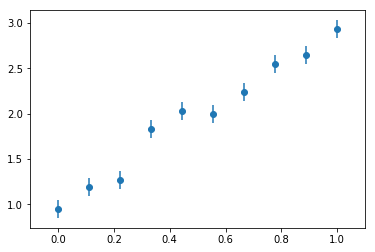

In [2]:
# let's make a line model
def line(x, a, b):
    return a + x * b

a_true = 1.0
b_true = 2.0

# let's make some data
x = np.linspace(0, 1, 10)

# precomputed random numbers from standard normal distribution
z = np.array([-0.49783783, -0.33041722, -1.71800806,  1.60229399,
                 1.36682387, -1.15424221, -0.91425267, -0.03395604,
                 -1.27611719, -0.7004073 ])

sigma_y = 0.1 * np.ones_like(x)
y = line(x, a_true, b_true) + sigma_y * z

plt.errorbar(x, y, sigma_y, fmt="o")
plt.xlim(-0.1, 1.1);

In [3]:
def LSQ(a, b):
    return np.sum((y-line(x,a,b))**2/sigma_y**2)

In [4]:
m = Minuit(LSQ)

RuntimeError: starting value(s) are required for a b

In [ ]:
m = Minuit(LSQ, a=5, b=5)

In [ ]:
m = Minuit(LSQ, a=5, b=5, error_a=0.1, error_b=0.1)

In [5]:
m = Minuit(LSQ, a=5, b=5, error_a=0.1, error_b=0.1, errordef=1)


RuntimeError: error_a is not one of the parameters [a b]

In [6]:
m = Minuit(LSQ, a=5, b=5,)
m.errors[0]=0.1
m.errors[1]=0.1
m.errordef = 1
m.errordef

1.0

In [7]:
# check current parameter state (do this at any time)
help(m)

Help on Minuit in module iminuit.minuit object:

class Minuit(builtins.object)
 |  Function minimizer and error computer.
 |  
 |  Methods defined here:
 |  
 |  __init__(self, fcn:Callable, *args:Union[float, Sequence[float]], grad:Union[Callable, NoneType]=None, name:Union[Sequence[str], NoneType]=None, **kwds)
 |      Initialize Minuit object.
 |      
 |      This does not start the minimization or perform any other work yet. Algorithms
 |      are started by calling the corresponding methods.
 |      
 |      Parameters
 |      ----------
 |      fcn :
 |          Function to minimize. See notes for details on what kind of functions are
 |          accepted.
 |      *args :
 |          Starting values for the minimization as positional arguments.
 |          See notes for details on how to set starting values.
 |      grad :
 |          Function that calculates the gradient and returns an iterable object with one
 |          entry for each parameter, which is the derivative for th

In [8]:
m.params

,Name,Value,Hesse Error,Minos Error-,Minos Error+,Limit-,Limit+,Fixed
0,a,5.0,0.1,,,,,
1,b,5.0,0.1,,,,,


In [9]:
# one-sided limit a > 0, two-sided limit 0 < b < 10
m = Minuit(LSQ, a=5, b=5)
m.errors[0]=0.1
m.errors[1]=0.1
m.limits[0]=(0,None)
m.limits[1]=(0,10)
m.errordef=1

In [10]:
m.params

,Name,Value,Hesse Error,Minos Error-,Minos Error+,Limit-,Limit+,Fixed
0,a,5.0,0.1,,,0,,
1,b,5.0,0.1,,,0,10,


In [11]:
m = Minuit(LSQ, a=2, b=5)
m.fixed[0]=True
m.errors[0]=0.1
m.errors[1]=0.1
m.errordef=1
m.params

,Name,Value,Hesse Error,Minos Error-,Minos Error+,Limit-,Limit+,Fixed
0,a,2.0,0.1,,,,,yes
1,b,5.0,0.1,,,,,


In [12]:
m.migrad()

┌──────────────────────────────────┬──────────────────────────────────────┐
│ FCN = 305.1                      │              Nfcn = 13               │
│ EDM = 2.33e-16 (Goal: 0.0002)    │                                      │
├───────────────┬──────────────────┼──────────────────────────────────────┤
│ Valid Minimum │ Valid Parameters │        No Parameters at limit        │
├───────────────┴──────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a    │    2.0    │    0.1    │            │            │         │         │  yes  │
│ 1 │ b    │   0.51    │   0.05    │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬─────────────────┐
│   │       a       b │
├───┼─────────────────┤
│ a │       0       0 │
│ b │       0 0.00284 │
└───┴─────────────────┘

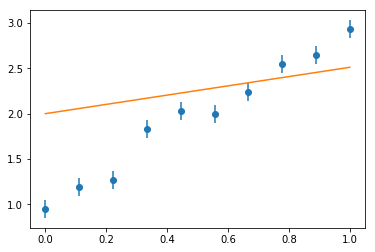

In [13]:
# get parameter values
a_fit = m.values["a"]  # m.values[0] also works
b_fit = m.values["b"]  # m.values[1] also works

plt.errorbar(x, y, sigma_y, fmt="o")
plt.plot(x, line(x, a_fit, b_fit));

In [14]:
# release fix on "a" and minimize again
m.fixed["a"] = False  # m.fixed[0] = False also works
m.migrad()

┌──────────────────────────────────┬──────────────────────────────────────┐
│ FCN = 10.39                      │              Nfcn = 42               │
│ EDM = 2.06e-14 (Goal: 0.0002)    │                                      │
├───────────────┬──────────────────┼──────────────────────────────────────┤
│ Valid Minimum │ Valid Parameters │        No Parameters at limit        │
├───────────────┴──────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a    │   0.99    │   0.06    │            │            │         │         │       │
│ 1 │ b    │   1.94    │   0.10    │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬───────────────────┐
│   │        a        b │
├───┼───────────────────┤
│ a │  0.00345 -0.00491 │
│ b │ -0.00491  0.00982 │
└───┴───────────────────┘

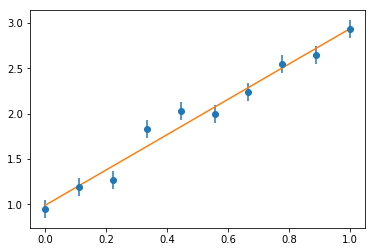

In [15]:
# get parameter values
a_fit = m.values["a"]  # m.values[0] also works
b_fit = m.values["b"]  # m.values[1] also works

plt.errorbar(x, y, sigma_y, fmt="o")
plt.plot(x, line(x, a_fit, b_fit));

In [16]:
def LSQ_numpy(par):  # par is numpy array here 
    ym = np.polyval(par, x)  # for len(par) == 2 this is a line
    return np.sum((y - ym) ** 2 / sigma_y ** 2)

In [17]:
# pass starting values and step sizes as numpy arrays
m = Minuit.from_array_func(LSQ_numpy, (5, 5), error=(0.1, 0.1), errordef=1)

# automatic parameter names are assigned x0, x1, ...
m.params

AttributeError: type object 'Minuit' has no attribute 'from_array_func'

In [18]:
help(m)

Help on Minuit in module iminuit.minuit object:

class Minuit(builtins.object)
 |  Function minimizer and error computer.
 |  
 |  Methods defined here:
 |  
 |  __init__(self, fcn:Callable, *args:Union[float, Sequence[float]], grad:Union[Callable, NoneType]=None, name:Union[Sequence[str], NoneType]=None, **kwds)
 |      Initialize Minuit object.
 |      
 |      This does not start the minimization or perform any other work yet. Algorithms
 |      are started by calling the corresponding methods.
 |      
 |      Parameters
 |      ----------
 |      fcn :
 |          Function to minimize. See notes for details on what kind of functions are
 |          accepted.
 |      *args :
 |          Starting values for the minimization as positional arguments.
 |          See notes for details on how to set starting values.
 |      grad :
 |          Function that calculates the gradient and returns an iterable object with one
 |          entry for each parameter, which is the derivative for th

In [19]:
m = Minuit(LSQ_numpy, (5, 5))
m.errors[0]=0.1
m.errors[1]=0.1
m.errordef=1
m.params

,Name,Value,Hesse Error,Minos Error-,Minos Error+,Limit-,Limit+,Fixed
0,x0,5.0,0.1,,,,,
1,x1,5.0,0.1,,,,,


In [20]:
m = Minuit(LSQ_numpy, (2,1,3,5),name=("a","b","c","d"))
m.errors=0.1
m.errordef=1
m.params

,Name,Value,Hesse Error,Minos Error-,Minos Error+,Limit-,Limit+,Fixed
0,a,2.0,0.1,,,,,
1,b,1.0,0.1,,,,,
2,c,3.0,0.1,,,,,
3,d,5.0,0.1,,,,,


In [21]:
m.migrad()

┌──────────────────────────────────┬──────────────────────────────────────┐
│ FCN = 9.033                      │              Nfcn = 96               │
│ EDM = 4.37e-13 (Goal: 0.0002)    │                                      │
├───────────────┬──────────────────┼──────────────────────────────────────┤
│ Valid Minimum │ Valid Parameters │        No Parameters at limit        │
├───────────────┴──────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a    │    0.8    │    1.3    │            │            │         │         │       │
│ 1 │ b    │   -1.5    │    2.0    │            │            │         │         │       │
│ 2 │ c    │    2.7    │    0.8    │            │            │         │         │       │
│ 3 │ d    │   0.91    │   0.09    │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬─────────────────────────────────┐
│   │       a       b       c       d │
├───┼─────────────────────────────────┤
│ a │    1.72   -2.58   0.979 -0.0595 │
│ b │   -2.58       4   -1.59   0.108 │
│ c │   0.979   -1.59   0.691 -0.0572 │
│ d │ -0.0595   0.108 -0.0572 0.00824 │
└───┴─────────────────────────────────┘

In [22]:
# can also use score function with scipy.optimize.minimize-like interface
from iminuit import minimize  # has same interface as scipy.optimize.minimize
minimize(LSQ_numpy, (5, 5, 5, 5))

      fun: 9.033192085977747
 hess_inv: [[ 0.86026056 -1.29039036  0.48960459 -0.02973733]
 [-1.29039036  1.99771546 -0.79653726  0.05381051]
 [ 0.48960459 -0.79653726  0.34569096 -0.02858364]
 [-0.02973733  0.05381051 -0.02858364  0.00411886]]
  message: 'Optimization terminated successfully.'
   minuit: <FMin edm=1.875960850240952e-19 edm_goal=0.0001 errordef=0.5 fval=9.033192085977747 has_accurate_covar=True has_covariance=True has_made_posdef_covar=False has_parameters_at_limit=False has_posdef_covar=True has_reached_call_limit=False has_valid_parameters=True hesse_failed=False is_above_max_edm=False is_valid=True nfcn=92 ngrad=0>
(Param(number=0, name='x0', value=0.765475497458128, error=0.9275023217498595, merror=None, is_const=False, is_fixed=False, has_limits=False, has_lower_limit=False, has_upper_limit=False, lower_limit=None, upper_limit=None), Param(number=1, name='x1', value=-1.5030492742563342, error=1.4134056246048023, merror=None, is_const=False, is_fixed=False, has_lim

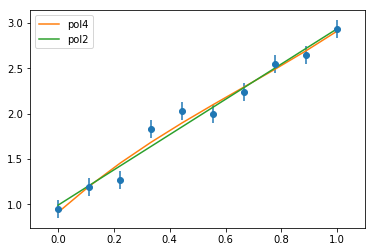

In [23]:
# get parameter values as arrays
par_fit = m.values[:]

plt.errorbar(x, y, sigma_y, fmt="o")
plt.plot(x, np.polyval(par_fit, x), label="pol4")
plt.plot(x, line(x, a_fit, b_fit), label="pol2")
plt.legend()
plt.xlim(-0.1, 1.1);

In [24]:
# check reduced chi2, goodness-of-fit estimate, should be around 1
m.fval / (len(y) - len(m.values))

1.5055320143296989

In [25]:
# calling hesse explicitly
m.hesse()

┌──────────────────────────────────┬──────────────────────────────────────┐
│ FCN = 9.033                      │              Nfcn = 119              │
│ EDM = 4.37e-13 (Goal: 0.0002)    │                                      │
├───────────────┬──────────────────┼──────────────────────────────────────┤
│ Valid Minimum │ Valid Parameters │        No Parameters at limit        │
├───────────────┴──────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a    │    0.8    │    1.3    │            │            │         │         │       │
│ 1 │ b    │   -1.5    │    2.0    │            │            │         │         │       │
│ 2 │ c    │    2.7    │    0.8    │            │            │         │         │       │
│ 3 │ d    │   0.91    │   0.09    │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬─────────────────────────────────┐
│   │       a       b       c       d │
├───┼─────────────────────────────────┤
│ a │    1.72   -2.58   0.979 -0.0595 │
│ b │   -2.58       4   -1.59   0.108 │
│ c │   0.979   -1.59   0.691 -0.0572 │
│ d │ -0.0595   0.108 -0.0572 0.00824 │
└───┴─────────────────────────────────┘

In [67]:
# get full correlation matrix (automatically prints nicely in notebook)
m.covariance.correlation()

,a,b,c,d
a,1,-0.984,0.898,-0.5
b,-0.984,1,-0.959,0.593
c,0.898,-0.959,1,-0.758
d,-0.5,0.593,-0.758,1


In [42]:
help(m.covariance)

Help on Matrix in module iminuit.util object:

class Matrix(numpy.ndarray)
 |  Enhanced Numpy ndarray.
 |  
 |  Works like a normal ndarray in computations, but also supports pretty printing in
 |  ipython and Jupyter notebooks. Elements can be accessed via indices or parameter names.
 |  
 |  Method resolution order:
 |      Matrix
 |      numpy.ndarray
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __array_finalize__(self, obj)
 |      For internal use.
 |  
 |  __getitem__(self, key)
 |      Get matrix element at key.
 |  
 |  __repr__(self)
 |      Get detailed text representation.
 |  
 |  __str__(self)
 |      Get user-friendly text representation.
 |  
 |  correlation(self)
 |      Compute and return correlation matrix.
 |      
 |      If the matrix is already a correlation matrix, this effectively returns a copy
 |      of the original matrix.
 |  
 |  to_table(self)
 |      Convert matrix to tabular format.
 |      
 |      The output is consumable by the ext

In [68]:
m.minos()

┌──────────────────────────────────┬──────────────────────────────────────┐
│ FCN = 9.033                      │              Nfcn = 289              │
│ EDM = 4.37e-13 (Goal: 0.0002)    │                                      │
├───────────────┬──────────────────┼──────────────────────────────────────┤
│ Valid Minimum │ Valid Parameters │        No Parameters at limit        │
├───────────────┴──────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a    │    0.8    │    1.3    │    -1.3    │    1.3     │         │         │       │
│ 1 │ b    │   -1.5    │    2.0    │    -2.0    │    2.0     │         │         │       │
│ 2 │ c    │    2.7    │    0.8    │    -0.8    │    0.8     │         │         │       │
│ 3 │ d    │   0.91    │   0.09    │   -0.09    │    0.09    │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌──────────┬───────────────────────┬───────────────────────┬───────────────────────┬───────────────────────┐
│          │           a           │           b           │           c           │           d           │
├──────────┼───────────┬───────────┼───────────┬───────────┼───────────┬───────────┼───────────┬───────────┤
│  Error   │   -1.3    │    1.3    │    -2     │     2     │   -0.8    │    0.8    │   -0.09   │   0.09    │
│  Valid   │   True    │   True    │   True    │   True    │   True    │   True    │   True    │   True    │
│ At Limit │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │
│ Max FCN  │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │
│ New Min  │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │
└──────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┘
┌───┬─────────────────────────────────┐
│   │       a       b       c       d │
├───┼─────────────────────────────────┤
│ a │    1.72   -2.58   0.979 -0.0595 │
│ b │   -2.58       4   -1.59   0.108 │
│ c │   0.979   -1.59   0.691 -0.0572 │
│ d │ -0.0595   0.108 -0.0572 0.00824 │
└───┴─────────────────────────────────┘

In [70]:
# Minos errors now appear in parameter table
m.params

,Name,Value,Hesse Error,Minos Error-,Minos Error+,Limit-,Limit+,Fixed
0,a,0.8,1.3,-1.3,1.3,,,
1,b,-1.5,2.0,-2.0,2.0,,,
2,c,2.7,0.8,-0.8,0.8,,,
3,d,0.91,0.09,-0.09,0.09,,,


In [138]:
# plot parameters with errors
v = m.values
ve = m.errors
vm = m.np_merrors()

npar = len(v)
indices = np.arange(npar)

# plot hesse errors
plt.errorbar(indices - 0.05, v, ve, fmt="ob")

# plot minos errors
plt.errorbar(indices + 0.05, v, vm, fmt="or")

# make nice labels
plt.xticks(indices, m.values.keys())
plt.xlim(-0.2, indices[-1] + 0.2)
plt.xlabel("parameter")
plt.ylabel("value");

AttributeError: 'Minuit' object has no attribute 'np_merrors'

In [73]:
help(m)

Help on Minuit in module iminuit.minuit object:

class Minuit(builtins.object)
 |  Function minimizer and error computer.
 |  
 |  Methods defined here:
 |  
 |  __init__(self, fcn:Callable, *args:Union[float, Sequence[float]], grad:Union[Callable, NoneType]=None, name:Union[Sequence[str], NoneType]=None, **kwds)
 |      Initialize Minuit object.
 |      
 |      This does not start the minimization or perform any other work yet. Algorithms
 |      are started by calling the corresponding methods.
 |      
 |      Parameters
 |      ----------
 |      fcn :
 |          Function to minimize. See notes for details on what kind of functions are
 |          accepted.
 |      *args :
 |          Starting values for the minimization as positional arguments.
 |          See notes for details on how to set starting values.
 |      grad :
 |          Function that calculates the gradient and returns an iterable object with one
 |          entry for each parameter, which is the derivative for th

In [84]:
help(m.merrors)

Help on MErrors in module iminuit.util object:

class MErrors(collections.OrderedDict)
 |  Dict-like map from parameter name to Minos result object.
 |  
 |  Method resolution order:
 |      MErrors
 |      collections.OrderedDict
 |      builtins.dict
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __getitem__(self, key)
 |      Get item at key, which can be an index or a parameter name.
 |  
 |  __repr__(self)
 |      Get detailed text representation.
 |  
 |  __str__(self)
 |      Get user-friendly text representation.
 |  
 |  ----------------------------------------------------------------------
 |  Methods inherited from collections.OrderedDict:
 |  
 |  __delitem__(self, key, /)
 |      Delete self[key].
 |  
 |  __eq__(self, value, /)
 |      Return self==value.
 |  
 |  __ge__(self, value, /)
 |      Return self>=value.
 |  
 |  __gt__(self, value, /)
 |      Return self>value.
 |  
 |  __init__(self, /, *args, **kwargs)
 |      Initialize self.  See help(type(

In [261]:
iterator = iter(m.merrors.items())
print(list(iterator))
print("#######")
print(m.merrors.items())
print("#######")
print(np.array(list(m.merrors.values())[0]))

[('a', <MError number=0 name='a' lower=-1.3116934413784869 upper=1.3116951749299768 is_valid=True lower_valid=True upper_valid=True at_lower_limit=False at_upper_limit=False at_lower_max_fcn=False at_upper_max_fcn=False lower_new_min=False upper_new_min=False nfcn=40 min=0.7654746306690914>), ('b', <MError number=1 name='b' lower=-1.9988711728823427 upper=1.9988685731421056 is_valid=True lower_valid=True upper_valid=True at_lower_limit=False at_upper_limit=False at_lower_max_fcn=False at_upper_max_fcn=False lower_new_min=False upper_new_min=False nfcn=50 min=-1.5030479743655434>), ('c', <MError number=2 name='c' lower=-0.8314980714879535 upper=0.8314990543551927 is_valid=True lower_valid=True upper_valid=True at_lower_limit=False at_upper_limit=False at_lower_max_fcn=False at_upper_max_fcn=False lower_new_min=False upper_new_min=False nfcn=40 min=2.735439751888631>), ('d', <MError number=3 name='d' lower=-0.0907621482399824 upper=0.0907620896762532 is_valid=True lower_valid=True upper_

In [215]:
help(m.errors)

Help on ErrorView in module iminuit.util object:

class ErrorView(BasicView)
 |  Array-like view of parameter errors.
 |  
 |  Method resolution order:
 |      ErrorView
 |      BasicView
 |      builtins.object
 |  
 |  Data descriptors defined here:
 |  
 |  __dict__
 |      dictionary for instance variables (if defined)
 |  
 |  __weakref__
 |      list of weak references to the object (if defined)
 |  
 |  ----------------------------------------------------------------------
 |  Methods inherited from BasicView:
 |  
 |  __eq__(self, other)
 |      Return true if all values are equal.
 |  
 |  __getitem__(self, key)
 |      Get value at key, which can be an index, a parameter name, or a slice.
 |  
 |  __init__(self, minuit, ndim=0)
 |      Not to be initialized by users.
 |  
 |  __iter__(self)
 |      Get iterator over values.
 |  
 |  __len__(self)
 |      Get number of paramters.
 |  
 |  __repr__(self)
 |      Get detailed text representation.
 |  
 |  __setitem__(self, key, 

In [161]:
m.params
#help(m.values)

,Name,Value,Hesse Error,Minos Error-,Minos Error+,Limit-,Limit+,Fixed
0,a,0.8,1.3,-1.3,1.3,,,
1,b,-1.5,2.0,-2.0,2.0,,,
2,c,2.7,0.8,-0.8,0.8,,,
3,d,0.91,0.09,-0.09,0.09,,,


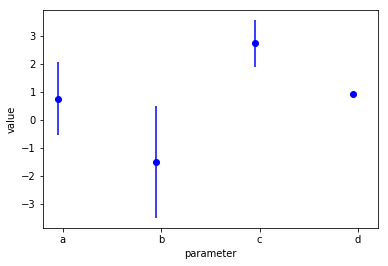

In [162]:
npar = len(v)
indices = np.arange(npar)

# plot hesse errors
plt.errorbar(indices - 0.05, v, ve, fmt="ob")

# plot minos errors
#plt.errorbar(indices + 0.05, v, vm, fmt="or")

# make nice labels
plt.xticks(indices, m.parameters)
plt.xlim(-0.2, indices[-1] + 0.2)
plt.xlabel("parameter")
plt.ylabel("value");

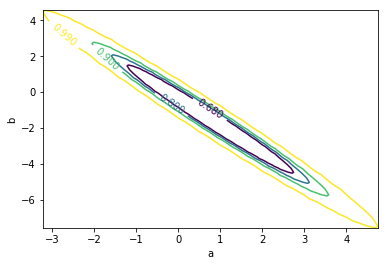

In [200]:
m.draw_mncontour("a", "b",cl=[0.68, 0.80,0.9,0.99] )

In [179]:
help(m.draw_mncontour)

Help on method draw_mncontour in module iminuit.minuit:

draw_mncontour(x:str, y:str, *, cl:Union[float, NoneType]=None, size:int=100) -> Sequence[Sequence[float]] method of iminuit.minuit.Minuit instance
    Draw 2D Minos confidence region (requires matplotlib).
    
    See :meth:`mncontour` for details on parameters and interpretation.
    
    Examples
    --------
    .. plot:: plots/mncontour.py
        :include-source:
    
    See Also
    --------
    mncontour



In [180]:
help(m.mncontour)

Help on method mncontour in module iminuit.minuit:

mncontour(x:str, y:str, *, cl:Union[float, NoneType]=None, size:int=100) -> Sequence[Sequence[float]] method of iminuit.minuit.Minuit instance
    Get 2D MINOS confidence region.
    
    This scans over two parameters and minimises all other free parameters for each
    scan point. This scan produces a statistical confidence region according to the
    `profile likelihood method <https://en.wikipedia.org/wiki/Likelihood_function>`_
    with a confidence level `cl`, which is asymptotically equal to the coverage
    probability of the confidence region.
    
    The calculation is expensive since a numerical minimisation has to be performed
    at various points.
    
    Parameters
    ----------
    x :
        Variable name of the first parameter.
    y :
        Variable name of the second parameter.
    cl :
        Confidence level of the contour. If None, a standard 68 % contour is computed
        (Default: None). Setting this 

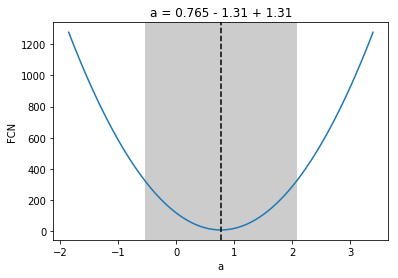

In [202]:
m.draw_profile("a");

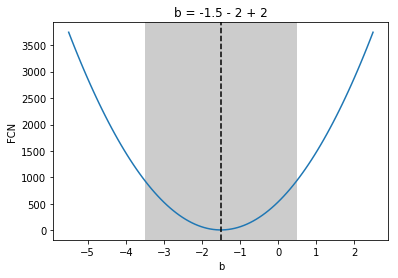

In [203]:
m.draw_profile("b");

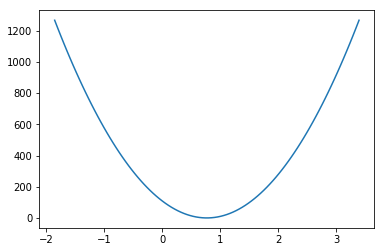

In [204]:
# get scan data to plot it yourself
px, py = m.profile('a', subtract_min=True)
plt.plot(px, py);